In [1]:
!pip install prophet



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
import matplotlib.pyplot as plt

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### We Load and prepare the data

In [3]:
import pandas as pd

df1 = pd.read_csv(r'C:\Users\USER\Desktop\AI\prevalence-by-mental-and-substance-use-disorder.csv')
df2 = pd.read_csv(r'C:\Users\USER\Desktop\AI\mental-and-substance-use-as-share-of-disease.csv')


In [4]:
df1.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [5]:
df2.head(10)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
5,Afghanistan,AFG,1995,1.738272
6,Afghanistan,AFG,1996,1.778098
7,Afghanistan,AFG,1997,1.781815
8,Afghanistan,AFG,1998,1.729402
9,Afghanistan,AFG,1999,1.850988


In [6]:
data = pd.merge(df1,df2)


data.head(10)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,AFG,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,AFG,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,AFG,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,AFG,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,AFG,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988



### Now we are Cleaning the data


In [7]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [8]:
data.drop('Code',axis=1,inplace=True)

In [9]:
data.head(10)

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [10]:
data.size,data.shape

(68400, (6840, 10))

In [11]:
data = data.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','Drug_usage','Depression','Alcohol','Mental_fitness'], axis='columns')
dff=data.copy()
dff.to_csv('dff_output.csv', index=False)

In [12]:
data.head(10)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


### Visulaization

[]

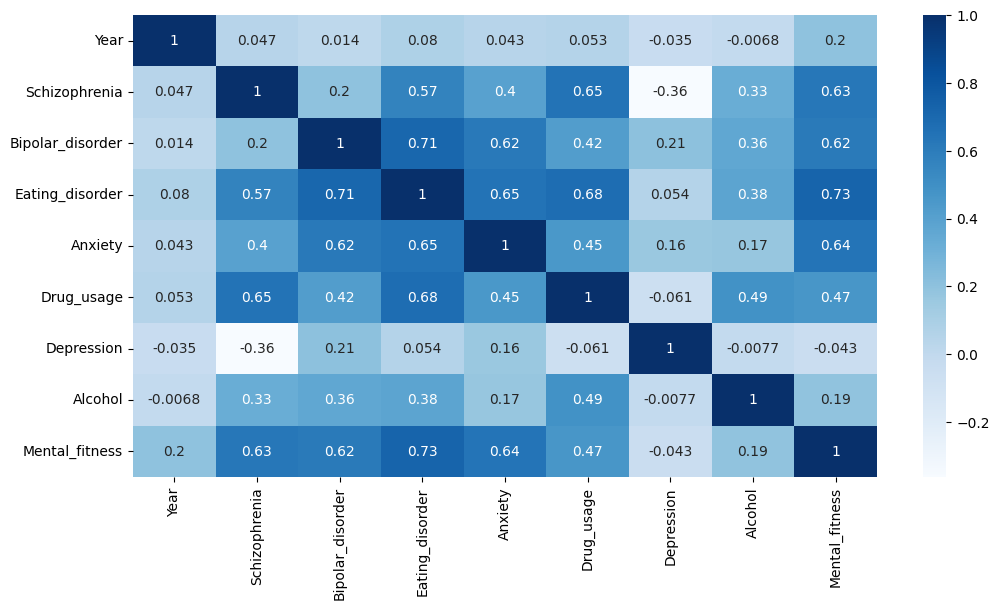

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame

# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='Blues')
plt.plot()

**Takeaway Points:**

*   Schizophrenia is positively correlated
*   Bipolar Disorder is positively correlated
*   Eating Disorder is positively correlated
*   Anxiety is positively correlated
*   Drug Usage is positively correlated
*   Depression is Negatively correlated
*   Alcohol is positively correlated

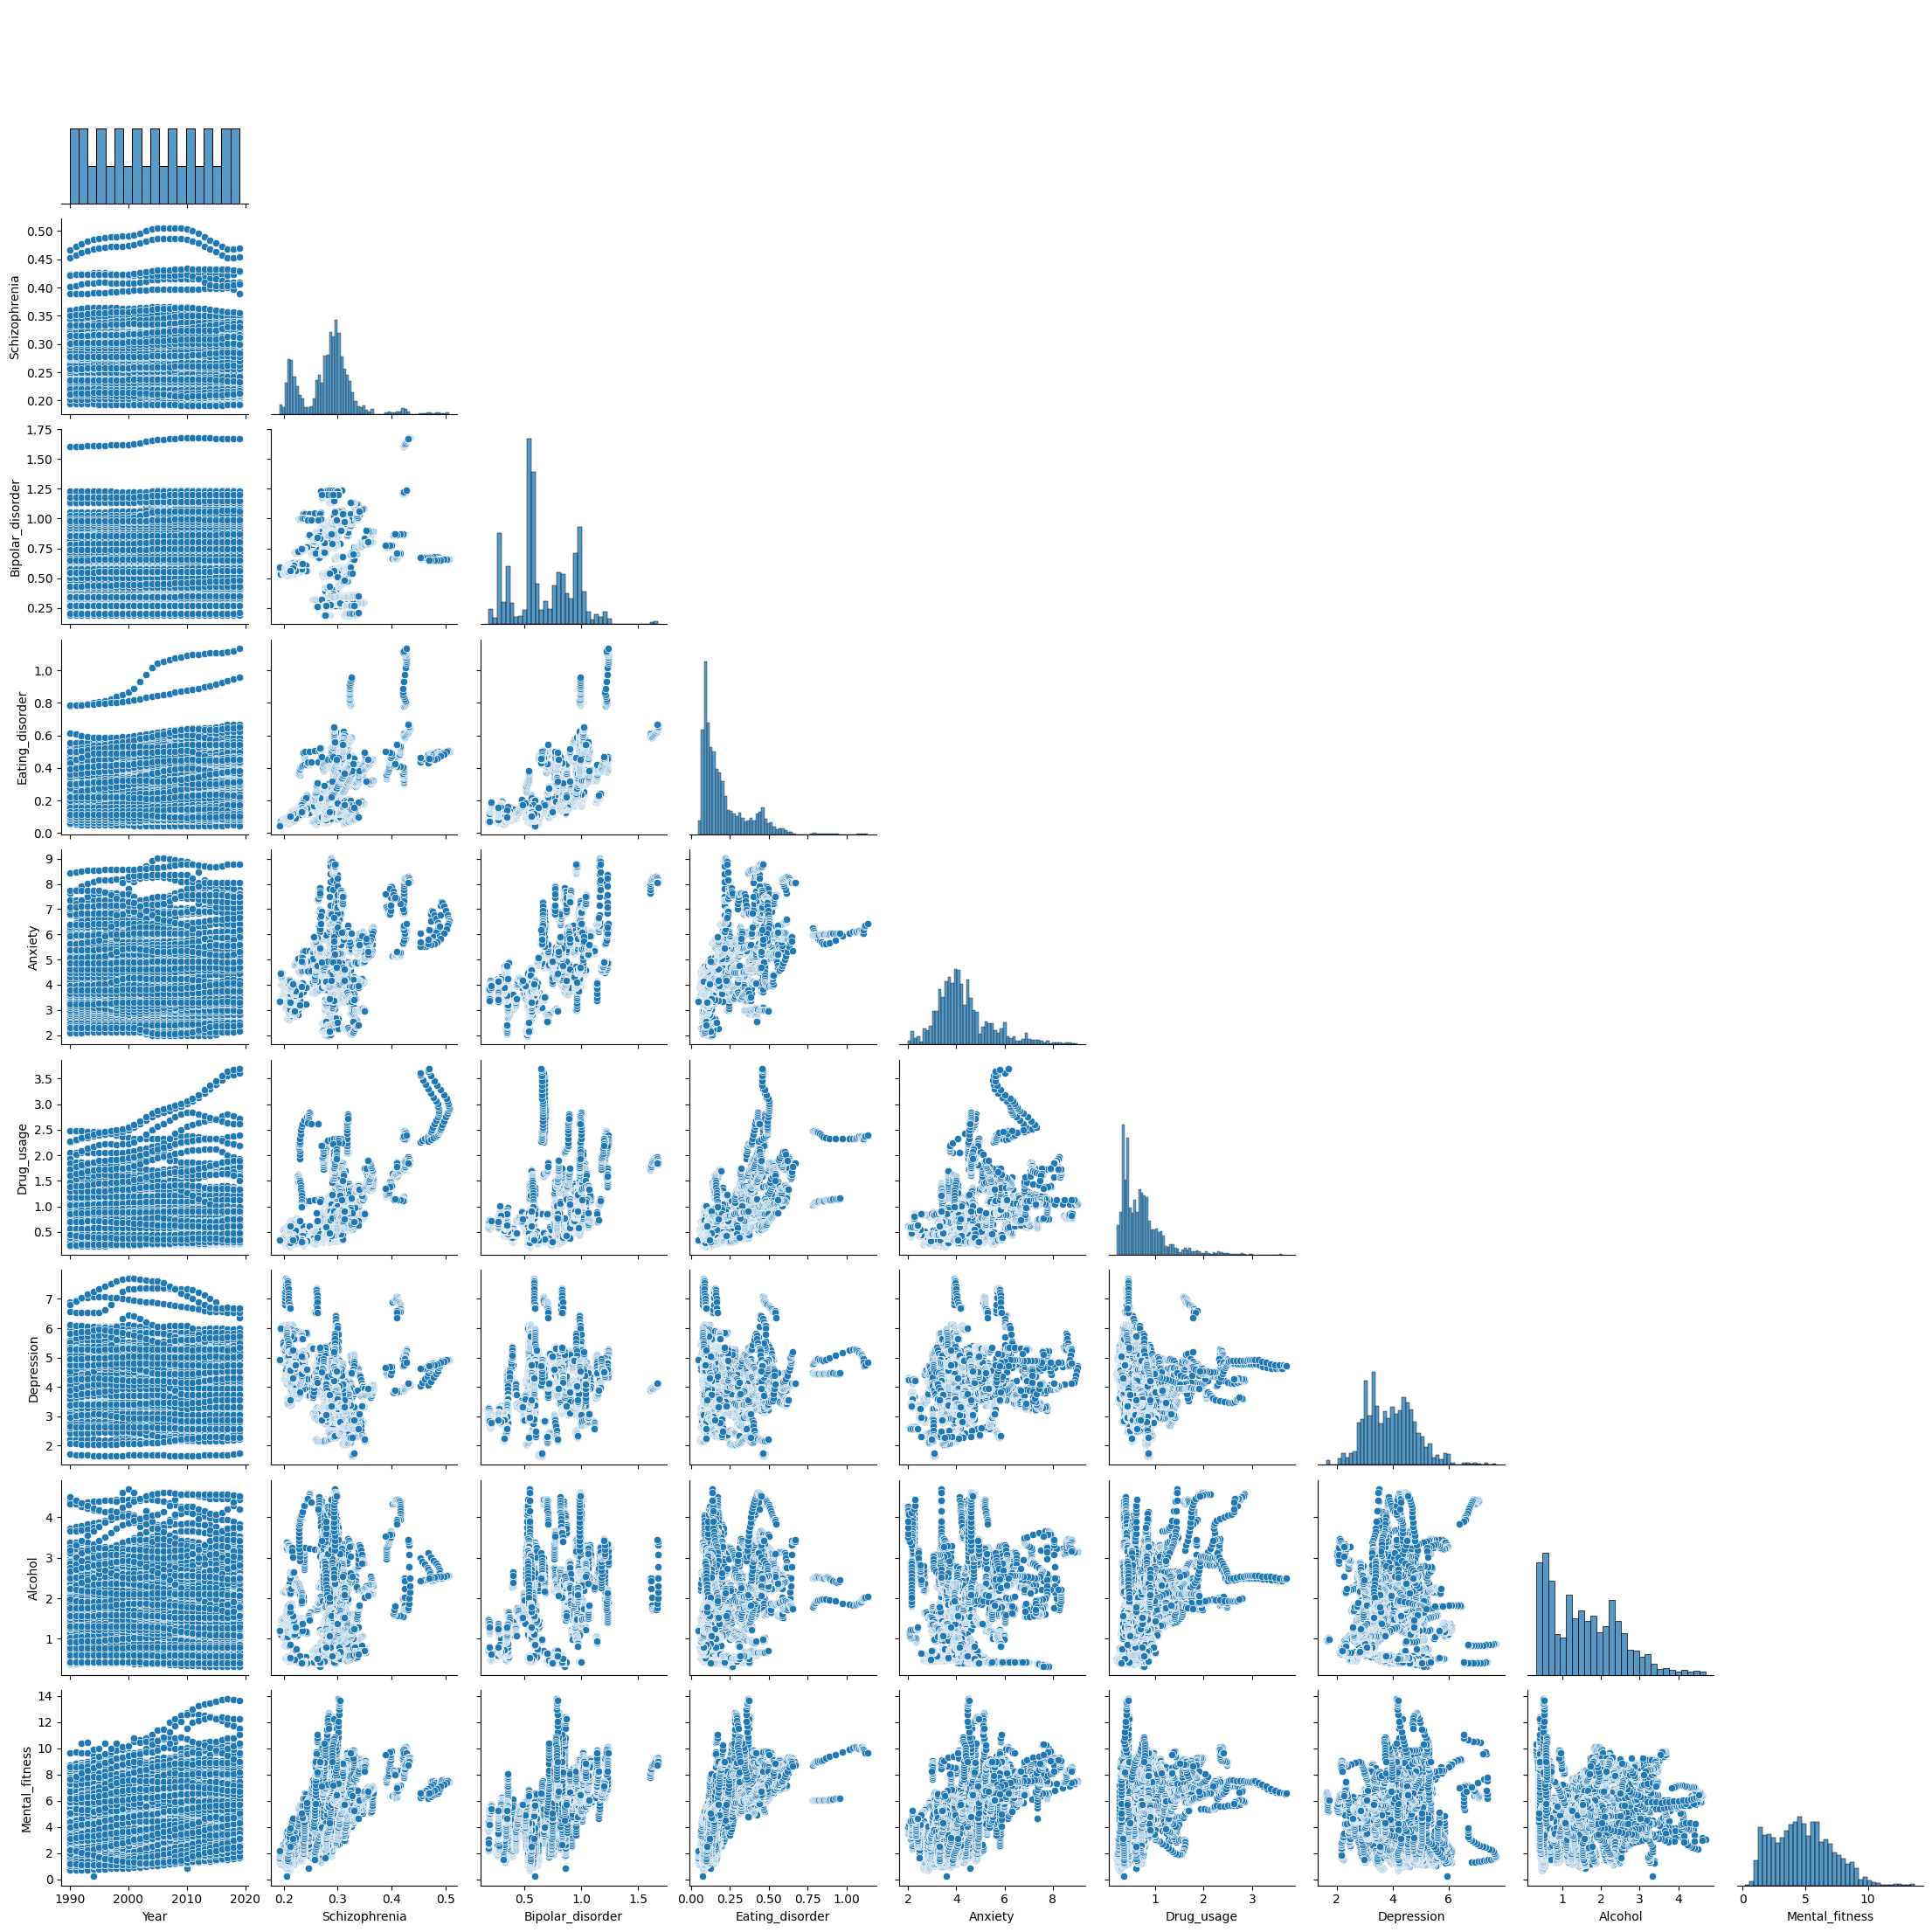

In [14]:
sns.pairplot(data,corner=True)
plt.show()

In [15]:
mean = data['Mental_fitness'].mean()
mean

np.float64(4.8180618117506135)

In [16]:
fig = px.pie(data,values='Mental_fitness', names='Year')
fig.show()

In [17]:
fig = px.line(data, x="Year", y="Mental_fitness", color='Country', markers=True,color_discrete_sequence=['red','blue','green','yellow','white'], template='plotly_dark')
fig.show()

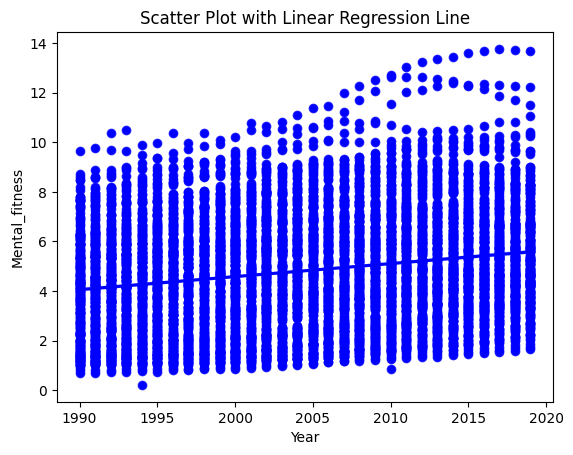

In [18]:
sns.scatterplot(data, x="Year", y="Mental_fitness", color="blue")

sns.regplot(data, x="Year", y="Mental_fitness", color="blue")

plt.xlabel("Year")
plt.ylabel("Mental_fitness")
plt.title("Scatter Plot with Linear Regression Line")

plt.show()


In [19]:
df = data
df.head(10)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_usage        6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol           6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 534.5+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]= l.fit_transform(df[i])

In [22]:
df.head(10)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
0,0,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,0,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,0,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,0,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,0,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,0,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,0,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,0,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,0,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,0,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [23]:
unique_values = df['Country'].unique()
print(unique_values)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227]


In [24]:
df.shape

(6840, 10)

### Split Data -(6840,10)
*   In this step, we are going to split data in two parts(training and testing), so that we can train our model on training dataset and test its accuracy on unseen test data.





In [25]:
x = df.drop('Mental_fitness', axis=1)
y = df['Mental_fitness']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.20, random_state=2)

In [26]:
print("xtrain: ", xtrain.shape)
print("xtest: ", xtest.shape)
print("ytrain: ", ytrain.shape)
print("ytest: ", ytest.shape)

xtrain:  (5472, 9)
xtest:  (1368, 9)
ytrain:  (5472,)
ytest:  (1368,)


### Feature Engineering

Cumulative Explained Variance Ratio: [0.37967382 0.54350126 0.65541759 0.76270393 0.85513572 0.91453934
 0.95384017 0.98207237 1.        ]


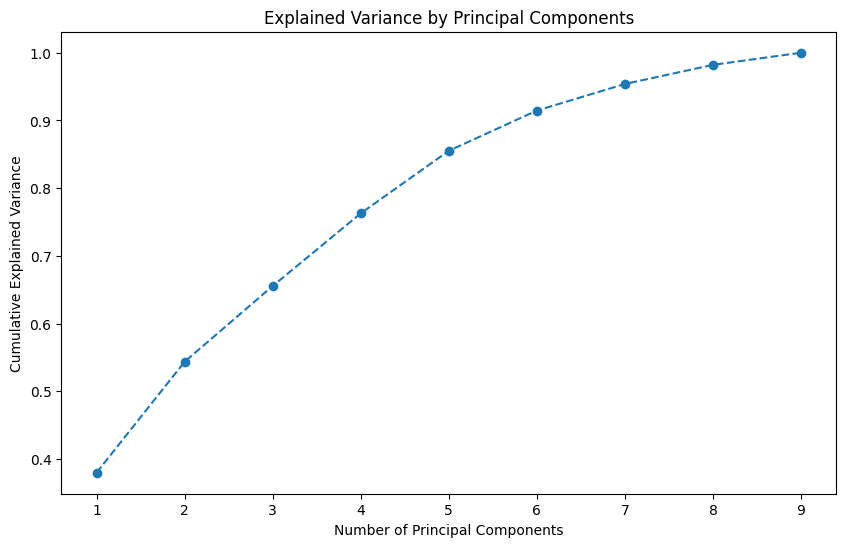

Number of components to retain 95% variance: 7
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.096877  2.374960 -1.136503 -0.932319 -1.240563 -0.547375 -0.013694
1 -1.126932  2.364642 -1.026841 -0.932311 -1.203053 -0.531581 -0.003037
2 -1.157677  2.350797 -0.918091 -0.933714 -1.162364 -0.517424  0.003488
3 -1.183023  2.342856 -0.808430 -0.932400 -1.124471 -0.503712  0.011811
4 -1.202090  2.340974 -0.698262 -0.927846 -1.087994 -0.493201  0.021049


In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Work on a copy of the original data
df_copy = df.copy()

# Select numerical columns excluding 'Mental_fitness' (adjust the column name as needed)
numerical_data = df_copy.select_dtypes(include=['number']).drop('Mental_fitness', axis=1, errors='ignore')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:", explained_variance_ratio)

# Plot explained variance to choose the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Select the number of components
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

# Create a new DataFrame for PCA components
pca_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])



print(pca_df.head())


In [28]:
x_fe = pca_df
y_fe = df['Mental_fitness']

from sklearn.model_selection import train_test_split
xfetrain, xfetest, yfetrain, yfetest = train_test_split(x_fe, y_fe, test_size=.20, random_state=2)

In [29]:
print("xfetrain: ", xtrain.shape)
print("xfetest: ", xtest.shape)
print("yfetrain: ", ytrain.shape)
print("yfetest: ", ytest.shape)

xfetrain:  (5472, 9)
xfetest:  (1368, 9)
yfetrain:  (5472,)
yfetest:  (1368,)


### Model Training

*   **Linear Regression:** Linear Regression analysis is used to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable. The variable we are using to predict the other variable's value is called the independent variable.

     
     Y = AX + B

     Y: Dependent Variable
     A: Slope
     X: Independent Variable
     B: y-intercept


*   **Random Forest Regressor:** A Random Forest is a meta estimator that fits a number of classifying decision tress on sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It is used to solve both regression and classification problems.


*  **Multi-Level Perceptron Regression:** Multilayer Perceptron (MLP) regression is a type of neural network model used for regression tasks. It consists of multiple layers of interconnected artificial neurons, allowing it to learn complex nonlinear relationships between input features and target variables. MLP regression models are trained to predict continuous numerical outputs based on input variables, making them suitable for various regression problems.


* **Lasso Regression:**
Lasso Regression, short for Least Absolute Shrinkage and Selection Operator, is a linear regression technique that includes an L1 regularization term. This regularization term penalizes the absolute values of the regression coefficients, encouraging sparsity by shrinking some coefficients to zero. By doing so, Lasso not only helps prevent overfitting but also performs feature selection, retaining only the most important features in the model. Lasso Regression is particularly useful in high-dimensional datasets where there are many irrelevant or correlated features, making it an effective tool for improving interpretability and model performance.







In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)
 #Linear Regression on Original data

ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 1.389959372405798
RMSE is 1.1789653821914357
R2 score is 0.7413245790025275


The model performance for testing set
--------------------------------------
MSE is 1.1357545319272409
RMSE is 1.0657178481789826
R2 score is 0.7638974087055268


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(xfetrain, yfetrain)

# Make predictions on training and testing sets
y_train_pred = lr.predict(xfetrain)
y_test_pred = lr.predict(xfetest)

# Evaluate model performance
mse_train = mean_squared_error(yfetrain, y_train_pred)
mse_test = mean_squared_error(yfetest, y_test_pred)
r2_train = r2_score(yfetrain, y_train_pred)
r2_test = r2_score(yfetest, y_test_pred)

# Print performance metrics
print("Linear Regression Model Performance:")
print("--------------------------------------")
print(f"Train MSE: {mse_train}, Train R²: {r2_train}")
print(f"Test MSE: {mse_test}, Test R²: {r2_test}")


Linear Regression Model Performance:
--------------------------------------
Train MSE: 1.7943584620887465, Train R²: 0.6660647499374006
Test MSE: 1.5146475112002222, Test R²: 0.6851324892490003


In [32]:
from sklearn.linear_model import  Lasso
ls = Lasso(alpha=0.5)
ls.fit(xtrain, ytrain)
y_predict2 = ls.predict(xtrain) #Predicting the y based on training
mse = mean_squared_error(ytrain,y_predict2) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(ytrain,y_predict2)
print("  Lasso Regression Model Performance : \n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

  Lasso Regression Model Performance : 

MSE : 3.2098544482862335
RMSE : 1.791606666734145
r2 : 0.40263689195899555


In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



lasso = Lasso(alpha=0.5)  # adjust alpha for regularization strength
lasso.fit(xfetrain, yfetrain)

# Make predictions on training and testing sets
y_train_pred = lasso.predict(xfetrain)
y_test_pred = lasso.predict(xfetest)

# Evaluate model performance
mse_train = mean_squared_error(yfetrain, y_train_pred)
mse_test = mean_squared_error(yfetest, y_test_pred)
r2_train = r2_score(yfetrain, y_train_pred)
r2_test = r2_score(yfetest, y_test_pred)

# Print performance metrics
print("Lasso Regression Model Performance:")
print("--------------------------------------")
print(f"Train MSE: {mse_train}, Train R²: {r2_train}")
print(f"Test MSE: {mse_test}, Test R²: {r2_test}")


Lasso Regression Model Performance:
--------------------------------------
Train MSE: 2.4286141343324505, Train R²: 0.5480279523915108
Test MSE: 2.015104380876639, Test R²: 0.5810966606961347


In [34]:
from sklearn.ensemble import RandomForestRegressor
import joblib
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

ytrain_pred = rf.predict(xtrain)
joblib.dump(rf, 'rf_model.pkl') 

mse = mean_squared_error(ytrain,ytrain_pred)

rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))

r2 = r2_score(ytrain, ytrain_pred)

print("The RandomForestRegressor model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# Predictions for the test set
ytest_pred = rf.predict(xtest)

# Evaluate test set performance
mse_test = mean_squared_error(ytest, ytest_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(ytest, ytest_pred)

# Print results
print("\nThe RandomForestRegressor model performance for the test set")
print("--------------------------------------")
print(f'MSE is {mse_test}')
print(f'RMSE is {rmse_test}')
print(f'R2 score is {r2_test}')


The RandomForestRegressor model performance for training set
--------------------------------------
MSE is 0.004915786831734074
RMSE is 0.07011267240473774
R2 score is 0.9990851579884441

The RandomForestRegressor model performance for the test set
--------------------------------------
MSE is 0.03084875126368359
RMSE is 0.17563812588297448
R2 score is 0.9935871089158719


In [35]:

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

mlp.fit(xtrain, ytrain)

ytrain_pred = mlp.predict(xtrain)

mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytrain, ytrain_pred)

print("The MLPRegressor model performance for the training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# Predictions for the test set
ytest_pred = mlp.predict(xtest)

# Evaluate test set performance
mse_test = mean_squared_error(ytest, ytest_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(ytest, ytest_pred)

# Print results
print("\nThe MLPRegressor model performance for the test set")
print("--------------------------------------")
print(f'MSE is {mse_test}')
print(f'RMSE is {rmse_test}')
print(f'R2 score is {r2_test}')

The MLPRegressor model performance for the training set
--------------------------------------
MSE is 3.0199464495182045
RMSE is 1.7377993122101885
R2 score is 0.43797931455590977

The MLPRegressor model performance for the test set
--------------------------------------
MSE is 2.6744830142704723
RMSE is 1.635384668593439
R2 score is 0.44402390455725294


In [36]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50)],         
    'activation': ['relu'],                            
    'solver': ['adam'],                                # Stick to Adam (faster for large networks)
    'alpha': [0.001],                                 
    'learning_rate': ['adaptive'],                    
    'max_iter': [500]                                  
}



In [37]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for RandomizedSearchCV


# Initialize the base model
mlp = MLPRegressor(random_state=42)

# Scale the entire training and test data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Randomly sample 50% of the training data
xtrain_sample = xtrain.sample(frac=0.5, random_state=42)
ytrain_sample = ytrain.loc[xtrain_sample.index]

# Scale only the sampled training data
xtrain_sample_scaled = scaler.fit_transform(xtrain_sample)

# Define the RandomizedSearchCV
grid_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_grid,
    n_iter=10,              # Number of random parameter combinations to test
    cv=3,                   # 3-fold cross-validation
    scoring='r2',           # Use R^2 score as the evaluation metric
    random_state=42,        # Ensure reproducibility
    verbose=2,              # Print progress during search
    n_jobs=-1               # Use all available processors
)

# Perform the grid search on the scaled sampled data
grid_search.fit(xtrain_sample_scaled, ytrain_sample)

# Retrieve the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Train the best model on the full scaled training data
best_mlp = grid_search.best_estimator_
best_mlp.fit(xtrain_scaled, ytrain)

# Evaluate on the test set
ytest_pred = best_mlp.predict(xtest_scaled)
mse = mean_squared_error(ytest, ytest_pred)
r2 = r2_score(ytest, ytest_pred)

# Print the evaluation results
print("Test Set Performance:")
print(f"MSE: {mse}")
print(f"R2: {r2}")


Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.

c:\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



Best Parameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.001, 'activation': 'relu'}
Best Cross-Validation Score: 0.9795178873455649
Test Set Performance:
MSE: 0.039564426945532985
R2: 0.9917752793739064


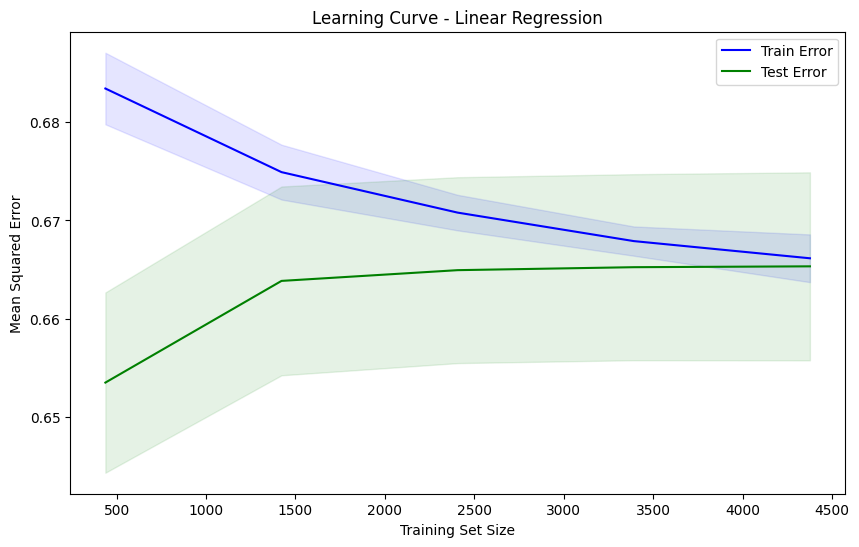

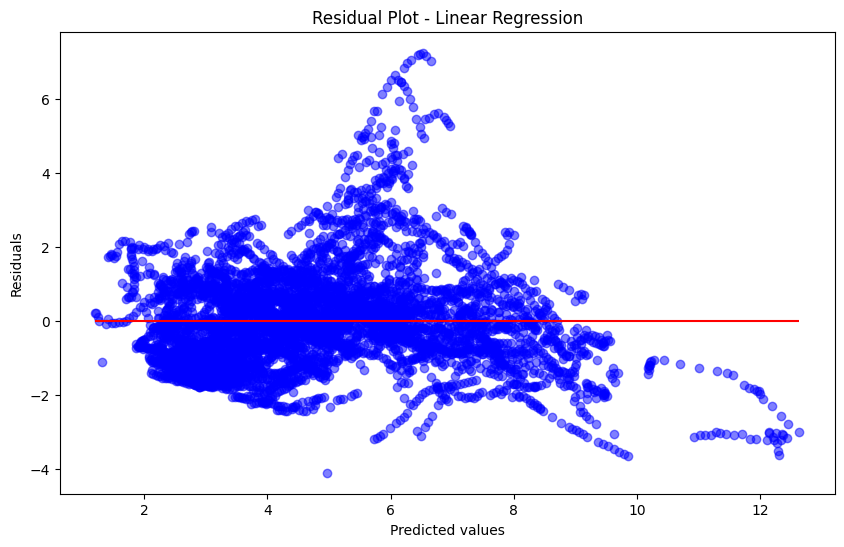

In [38]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression model
lr = LinearRegression()
lr.fit(xfetrain, yfetrain)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(lr, xfetrain, yfetrain, cv=5, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Error', color='blue')
plt.plot(train_sizes, test_mean, label='Test Error', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve - Linear Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Residual Plot
ytrain_pred = lr.predict(xfetrain)
residuals = yfetrain - ytrain_pred

plt.figure(figsize=(10, 6))
plt.scatter(ytrain_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=min(ytrain_pred), xmax=max(ytrain_pred), colors='red')
plt.title('Residual Plot - Linear Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


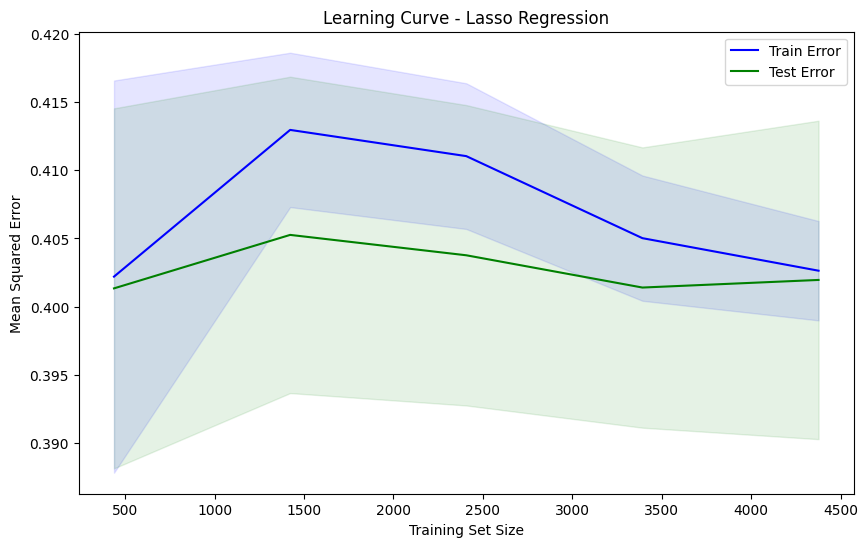

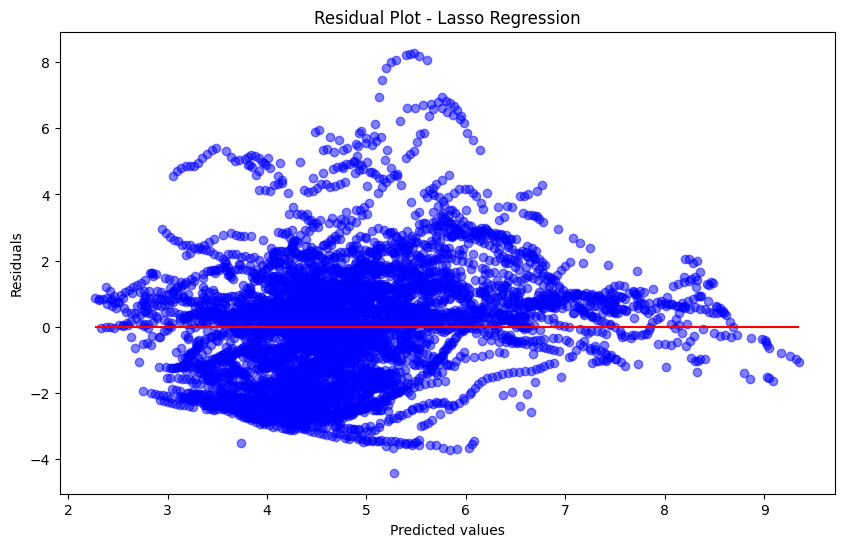

In [39]:
from sklearn.linear_model import Lasso

# Lasso model
ls = Lasso(alpha=0.5)
ls.fit(xtrain, ytrain)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(ls, xtrain, ytrain, cv=5, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Error', color='blue')
plt.plot(train_sizes, test_mean, label='Test Error', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve - Lasso Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Residual Plot
ytrain_pred = ls.predict(xtrain)
residuals = ytrain - ytrain_pred

plt.figure(figsize=(10, 6))
plt.scatter(ytrain_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=min(ytrain_pred), xmax=max(ytrain_pred), colors='red')
plt.title('Residual Plot - Lasso Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


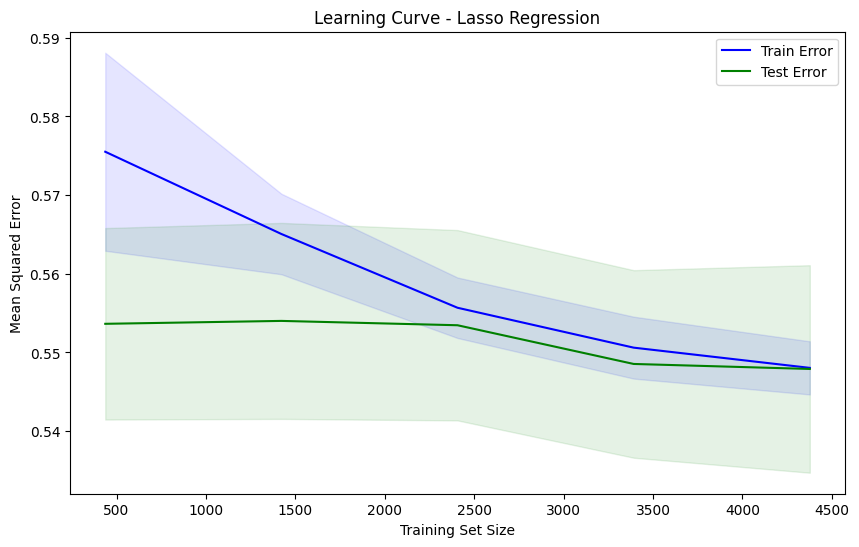

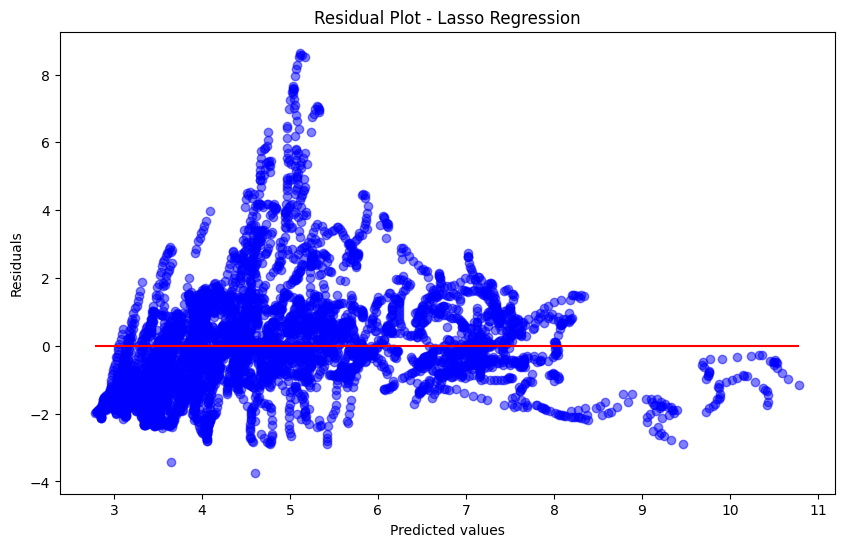

In [40]:
from sklearn.linear_model import Lasso

# Lasso model
ls = Lasso(alpha=0.5)
ls.fit(xfetrain, yfetrain)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(ls, xfetrain, yfetrain, cv=5, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Error', color='blue')
plt.plot(train_sizes, test_mean, label='Test Error', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve - Lasso Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Residual Plot
ytrain_pred = ls.predict(xfetrain)
residuals = ytrain - ytrain_pred

plt.figure(figsize=(10, 6))
plt.scatter(ytrain_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=min(ytrain_pred), xmax=max(ytrain_pred), colors='red')
plt.title('Residual Plot - Lasso Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


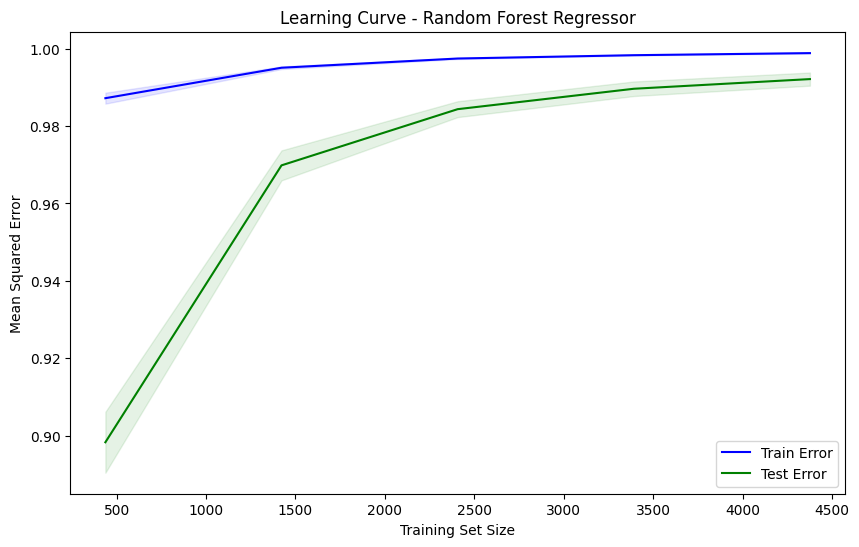

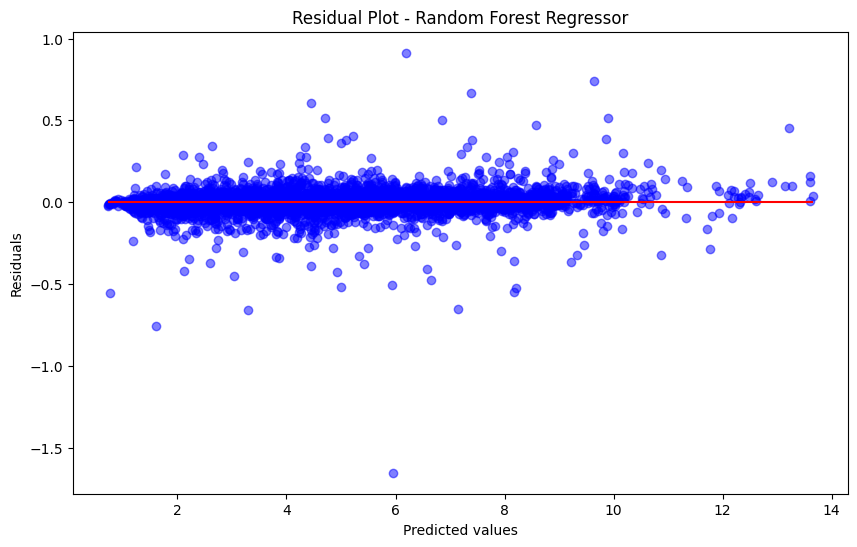

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf, xtrain, ytrain, cv=5, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Error', color='blue')
plt.plot(train_sizes, test_mean, label='Test Error', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve - Random Forest Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Residual Plot
ytrain_pred = rf.predict(xtrain)
residuals = ytrain - ytrain_pred

plt.figure(figsize=(10, 6))
plt.scatter(ytrain_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=min(ytrain_pred), xmax=max(ytrain_pred), colors='red')
plt.title('Residual Plot - Random Forest Regressor')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


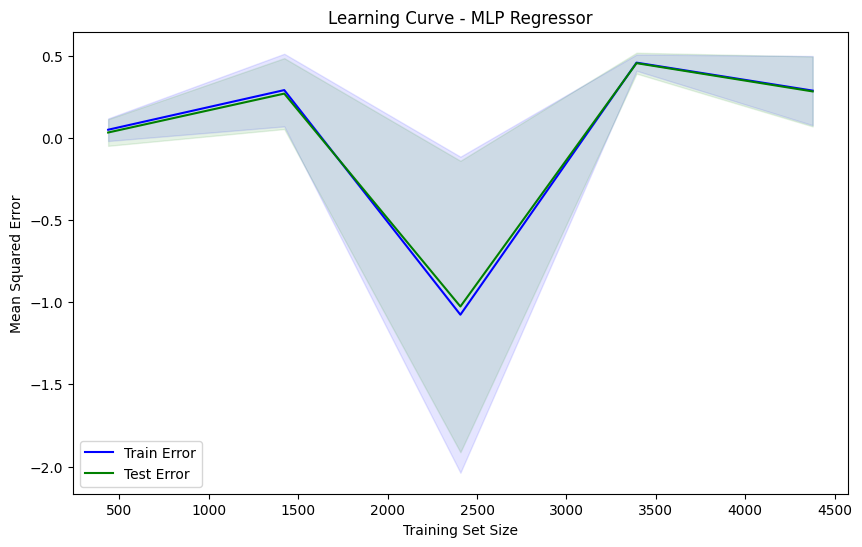

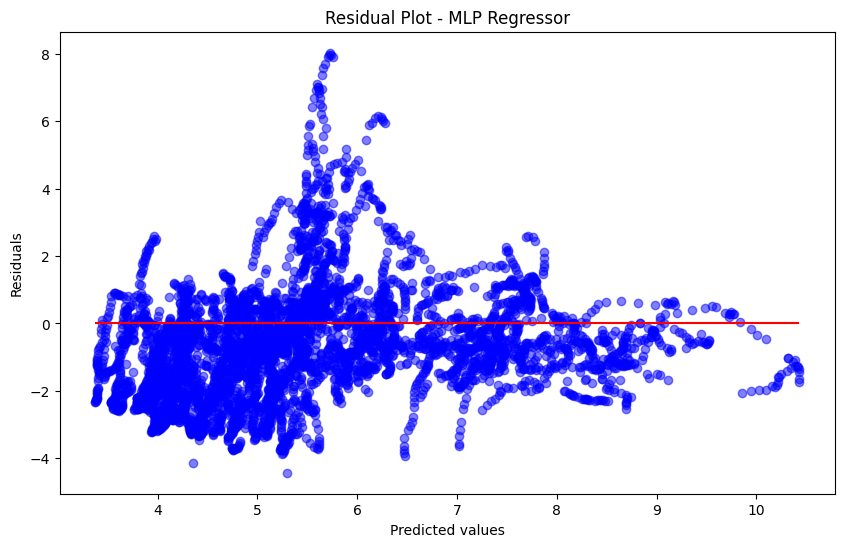

In [42]:
from sklearn.neural_network import MLPRegressor

# MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(xtrain, ytrain)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(mlp, xtrain, ytrain, cv=5, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Error', color='blue')
plt.plot(train_sizes, test_mean, label='Test Error', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve - MLP Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Residual Plot
ytrain_pred = mlp.predict(xtrain)
residuals = ytrain - ytrain_pred

plt.figure(figsize=(10, 6))
plt.scatter(ytrain_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=min(ytrain_pred), xmax=max(ytrain_pred), colors='red')
plt.title('Residual Plot - MLP Regressor')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()
